# 선형회귀

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 단순성형회귀 모델 만들기

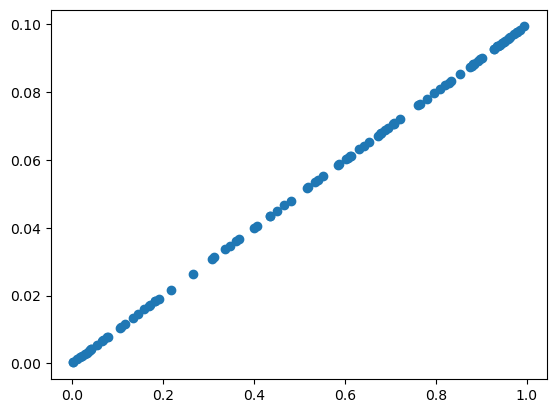

In [47]:
X = np.random.rand(100)
y = 0.2 * X * 0.5 # ax+b

plt.scatter(X,y)

In [48]:
def plt_prediction(pred, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X, y, color='blue', label='Actual')
    plt.scatter(X, pred, color='orange', label='Prediction')
    plt.legend()
    plt.show()

In [49]:
# 경사하강법 y = xW + b, w 결정
W = np.random.uniform(-1,1)
b = np.random.uniform(-1,1)
learning_rate = 0.5 # 임의 값

Epoch 0, W: 0.2185, Error: 0.8086


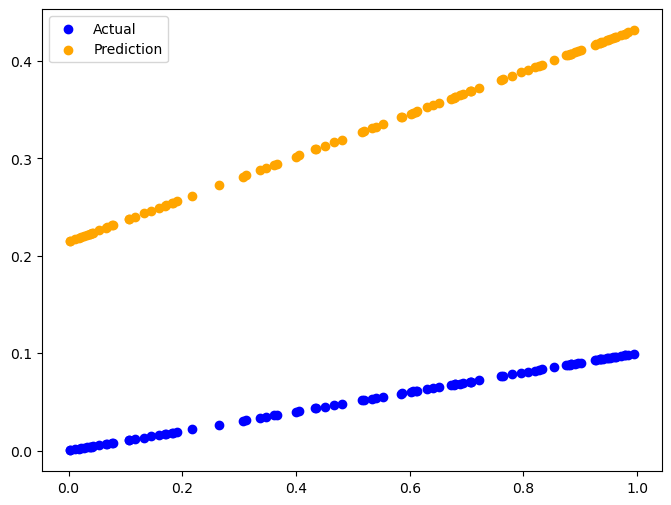

Epoch 10, W: 0.0967, Error: 0.0010


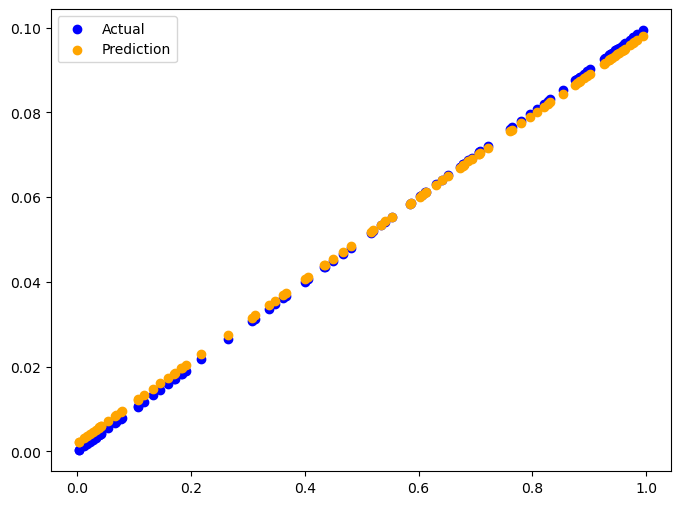

In [50]:
for epoch in range (100):
    y_pred = W * X + b
    error = np.abs(y_pred - y).mean()
    if error < 0.001: 
        break
    W_descent = learning_rate * ((y_pred - y) * X).mean()
    b_descent = learning_rate * ((y_pred - y).mean())
    W = W - W_descent
    b = b - b_descent
    
    if epoch%10 == 0:
        print(f'Epoch {epoch}, W: {W:.4f}, Error: {error:.4f}')
        y_pred = W * X + b
        plt_prediction(y_pred, y)

# 보스턴 data

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [52]:
bostonDF = pd.read_csv('data/boston.csv')
bostonDF.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [53]:
X = bostonDF.drop('target', axis = 1).values
y = bostonDF['target'].values
bostonDF.shape

(506, 14)

In [54]:
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 156)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred[:3]

array([23.15424087, 19.65590246, 36.42005168])

In [56]:
# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse, mse

(np.float64(4.158956107955705), np.float64(17.296915907902065))

In [57]:
# 결정계수
r2_score(y_test, y_pred)

np.float64(0.7572263323138934)

In [58]:
# 회귀식
# W1, W0
lr.intercept_, lr.coef_

(np.float64(40.99559517216439),
 array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
        -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
         3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
        -5.66182106e-01]))

y = x0 + w1 * X1 + x2 * X2 + ... w13 * X13

In [59]:
np.round(lr.intercept_, 1), np.round(lr.coef_, 1) # 위에 있는 식을 계산한 결과

(np.float64(41.0),
 array([ -0.1,   0.1,   0. ,   3. , -19.8,   3.4,   0. ,  -1.7,   0.4,
         -0. ,  -0.9,   0. ,  -0.6]))

In [60]:
pd.Series(data = np.round(lr.coef_, 1), index = bostonDF.drop('target', axis = 1).columns).sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
B           0.0
TAX        -0.0
AGE         0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [61]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(lr, X, y, scoring = 'neg_mean_squared_error', cv = 5)
neg_mse_scores

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [62]:
# MSE, RMSE
RMSE = np.sqrt(neg_mse_scores * -1)
np.mean(RMSE), RMSE

(np.float64(5.828658946215813),
 array([3.52991509, 5.10378498, 5.75101191, 8.9867887 , 5.77179405]))

In [63]:
# R2
r2_scores = cross_val_score(lr, X, y, scoring = 'r2', cv = 5)
r2_scores, np.mean(r2_scores)

(array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154]),
 np.float64(0.3532759243958839))

오차가 커지고 (4.15 -> 5.82), 결정계수는 작아진 결과 

# 다항회귀 모델

y = w0 + w1X1 + w2X2 +w3X1^2 + w4X2^2

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 156)
model_poly = Pipeline([
    ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
    ('linear', LinearRegression())]
)
model_poly.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])

In [66]:
pred_poly = model_poly.predict(X_test)
mean_squared_error(y_test, pred_poly)

np.float64(15.555752307472005)

In [67]:
r2_score(y_test, pred_poly)

np.float64(0.7816647163338353)

2차 ~ 5차 다항회귀 시뮬레이션

In [68]:
results = []

for degree in range(1, 5):
    model_poly = Pipeline([
        ('poly', PolynomialFeatures(degree = degree, include_bias = False)),
        ('linear', LinearRegression())]
    )
    model_poly.fit(X_train, y_train)
    pred_poly = model_poly.predict(X_test)
    mse = mean_squared_error(y_test, pred_poly)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred_poly)
    
    results.append({'degree': degree,
                    'MSE': mse,
                    'RMSE': rmse,
                    'R2':r2})
    
pd.DataFrame(results)

,degree,MSE,RMSE,R2
0,1,17.296916,4.158956,0.757226
1,2,15.555752,3.944078,0.781665
2,3,79625.592348,282.180071,-1116.597912
3,4,170599.948638,413.037466,-2393.483240


In [94]:
results = []
best_r2=-np.inf
best_model = None
best_pred = None

for degree in range(1,5):
  model_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('linear', LinearRegression())]
  )
  model_poly.fit(X_train, y_train)
  pred_poly = model_poly.predict(X_test)
  mse = mean_squared_error(y_test, pred_poly)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, pred_poly)
  
  results.append({ 'degree':degree,
                  'MSE':mse,
                  'RMSE':rmse,
                  'R2': r2})
  if r2> best_r2:
    best_r2 = r2
    best_model = model_poly
    best_pred = pred_poly
    
pd.DataFrame(results)

,degree,MSE,RMSE,R2
0,1,17.296916,4.158956,0.757226
1,2,15.555752,3.944078,0.781665
2,3,79625.592348,282.180071,-1116.597912
3,4,170599.948638,413.037466,-2393.483240


In [95]:
from sklearn.ensemble import RandomForestRegressor

results = []

for degree in range(1, 6):
    model_poly = Pipeline([
        ('poly', PolynomialFeatures(degree = degree, include_bias = False)),
        ('random', RandomForestRegressor())]
    )
    model_poly.fit(X_train, y_train)
    pred_poly = model_poly.predict(X_test)
    mse = mean_squared_error(y_test, pred_poly)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred_poly)
    
    results.append({'degree': degree,
                    'MSE': mse,
                    'RMSE': rmse,
                    'R2':r2})
    
pd.DataFrame(results)

,degree,MSE,RMSE,R2
0,1,7.649479,2.765769,0.892634
1,2,8.022856,2.832465,0.887394
2,3,6.803745,2.608399,0.904505
3,4,6.860353,2.619228,0.903710
4,5,7.594728,2.755853,0.893403


위에 있는 셀은 도는데 너무 오래걸려서 돌리다가 멈췄음

# 규제 회귀 모델

In [70]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [71]:
ridge = Ridge(alpha = 1.0)
ridge.fit(X_train, y_train)
pred_ridge = ridge.predict(X_test)

mse = mean_squared_error(y_test, pred_ridge)
r2 = r2_score(y_test, pred_ridge)
mse, r2

(np.float64(17.206833316177068), np.float64(0.7584907011357223))

다항 회귀 모델\
15.5, 0.78

## Ridge

In [72]:
from sklearn.linear_model import RidgeCV, LassoCV
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_cv = RidgeCV(alphas = alphas, cv = 5)

In [73]:
ridge_cv.fit(X_train, y_train)
ridge_preds = ridge_cv.predict(X_test)

In [74]:
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_r2 = r2_score(y_test, ridge_preds)
print(f'ridge cv msg: {ridge_mse:4f}, r2: {ridge_r2:4f}')

ridge cv msg: 17.296260, r2: 0.757236


In [75]:
ridge_cv.alpha_

np.float64(0.001)

## Lasso

In [76]:
lasso = Lasso(alpha = 1.0)
lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_test)

mse = mean_squared_error(y_test, pred_lasso)
r2 = r2_score(y_test, pred_lasso)
mse, r2

(np.float64(22.137098759778443), np.float64(0.6892911611262599))

In [77]:
from sklearn.linear_model import RidgeCV, LassoCV
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
lasso_cv = LassoCV(alphas = alphas, cv = 5, max_iter=10000)

In [78]:
lasso_cv.fit(X_train, y_train)
lasso_preds = lasso_cv.predict(X_test)

In [79]:
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_r2 = r2_score(y_test, lasso_preds)
print(f'lasso cv msg: {lasso_mse:4f}, r2: {lasso_r2:4f}')

lasso cv msg: 17.283109, r2: 0.757420


In [80]:
lasso_cv.alpha_

np.float64(0.001)

In [81]:
ridge_cv.coef_

array([-1.12963267e-01,  6.55168621e-02,  3.43623266e-02,  3.04560180e+00,
       -1.97781295e+01,  3.35506472e+00,  5.92317536e-03, -1.74158450e+00,
        3.55842743e-01, -1.42968313e-02, -9.19951783e-01,  1.03976785e-02,
       -5.66214215e-01])

In [82]:
lasso_cv.coef_

array([-1.12661593e-01,  6.56008407e-02,  3.30878096e-02,  3.02619848e+00,
       -1.94682482e+01,  3.35481221e+00,  5.71239360e-03, -1.73664047e+00,
        3.55109529e-01, -1.43215477e-02, -9.16008532e-01,  1.04167858e-02,
       -5.66946541e-01])

# 엘라스틱넷

In [83]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
enet.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [84]:
enet_pred = enet.predict(X_test)
print('n\[엘라스틱넷] 회귀')
print('MSE:', mean_squared_error(y_test, enet_pred))
print('R2:', r2_score(y_test, enet_pred))

n\[엘라스틱넷] 회귀
MSE: 18.11673827943616
R2: 0.7457195824951279


## 모델 성능 비교

In [90]:
results = pd.DataFrame({
    '모델': ['다항회귀', '릿지회귀', '라쏘회귀', '엘라스틱넷회귀'],
    'MSE': [mean_squared_error(y_test, pred_poly),
            mean_squared_error(y_test, pred_ridge),
            mean_squared_error(y_test, pred_lasso),
            mean_squared_error(y_test, enet_pred)
    ],
    'R2': [r2_score(y_test, pred_poly),
           r2_score(y_test, pred_ridge),
           r2_score(y_test, pred_lasso),
           r2_score(y_test, enet_pred),]
})

results

,모델,MSE,R2
0,다항회귀,7.216953,0.898705
1,릿지회귀,17.206833,0.758491
2,라쏘회귀,22.137099,0.689291
3,엘라스틱넷회귀,18.116738,0.745720
